# Initial experiments on bigger datasets

Same idea as the main notebook, but with different datesets:

* M1 species with minimum images per species ranging from 2 to 4
* Top ten genera

Conclusions:

* With top-3 accuracy of ~50% on the `rls-species-min-images-2`, it's viable for interactive tagging. Given that the experiment uses a 50-50 validation split, it means that some species are tagged based on a single example. 
* The top-10 genera is another story with perfect top-3 accuracy. It isn't practically interesting, though, as these genera are pretty distinct. But it may be useful to show likely genera alongside likely species.
* For the app use case, fitting on the full dataset without a validation set makes sense given the small amount of data. It doesn't appear too risky since the models don't appear to overfit too much with 120 epochs.

In [1]:
from fastai.vision.all import *
import mlflow

import experiments

In [2]:
mlflow.set_tracking_uri("sqlite:////home/yanir/projects/deep-fish/mlruns.db")
mlflow.set_registry_uri("file:///home/yanir/projects/deep-fish/mlruns")

In [4]:
mlflow.set_experiment("rls-species-min-images-4")
with mlflow.start_run(run_name="initial"):
    learner = experiments.create_reproducible_learner(
        resnet18, Path("/home/yanir/projects/deep-fish/data/rls-species-min-images-4")
    )
    mlflow.log_param("model", learner.arch.__name__)
    mlflow.log_param("item_tfms", "RandomResizedCrop(224, min_scale=0.5)")
    mlflow.log_param("batch_tfms", "aug_transforms()")
    learner.fine_tune(120)
    metrics = experiments.get_learner_metrics_with_tta(learner, tta_prefix="tta_", beta=0)
    print(metrics)
    mlflow.log_metrics(metrics)

epoch,train_loss,valid_loss,accuracy,top_3_accuracy,time
0,8.137529,6.529367,0.016949,0.036506,00:23


epoch,train_loss,valid_loss,accuracy,top_3_accuracy,time
0,6.755535,6.331712,0.026076,0.048240,00:29
1,6.415333,6.127299,0.035202,0.065189,00:32
2,6.080937,5.930771,0.043025,0.080834,00:34
3,5.767301,5.726932,0.056063,0.116037,00:34
4,5.371635,5.533617,0.071708,0.138201,00:34
5,5.048445,5.357936,0.073012,0.153846,00:34
6,4.703758,5.195693,0.091265,0.174707,00:34
7,4.331200,4.999745,0.118644,0.212516,00:35
8,3.988313,4.840925,0.132986,0.250326,00:34
9,3.651376,4.664551,0.165580,0.276402,00:35


{'train_loss': 0.005885654129087925, 'valid_loss': 3.2181355953216553, 'accuracy': 0.4550195634365082, 'top_3_accuracy': 0.591916561126709, 'tta_accuracy': 0.49804434180259705, 'tta_top_3_accuracy': 0.6140808463096619}


In [3]:
mlflow.set_experiment("rls-species-min-images-3")
with mlflow.start_run(run_name="initial"):
    class_names = [
        " ".join(path.name.split("-")[:2]).capitalize()
        for path in Path("/home/yanir/projects/deep-fish/data/rls-species-min-images-3").ls()
    ]
    learner = experiments.create_reproducible_learner(
        resnet18,
        Path("/home/yanir/projects/deep-fish/data/rls-species-min-images-3"),
        db_kwargs=dict(splitter=TrainTestSplitter(test_size=0.25, stratify=class_names, random_state=19)),
    )
    mlflow.log_param("model", learner.arch.__name__)
    mlflow.log_param("item_tfms", "RandomResizedCrop(224, min_scale=0.5)")
    mlflow.log_param("batch_tfms", "aug_transforms()")
    mlflow.log_param("splitter", "TrainTestSplitter(test_size=0.25, stratify=class_names, random_state=19)")
    learner.fine_tune(120)
    metrics = experiments.get_learner_metrics_with_tta(learner, tta_prefix="tta_", beta=0)
    print(metrics)
    mlflow.log_metrics(metrics)

epoch,train_loss,valid_loss,accuracy,top_3_accuracy,time
0,8.677940,6.940779,0.017517,0.035796,00:29


epoch,train_loss,valid_loss,accuracy,top_3_accuracy,time
0,7.254880,6.727590,0.022848,0.044935,00:40
1,6.892451,6.493554,0.033511,0.071592,00:43
2,6.559124,6.267745,0.051790,0.095202,00:46
3,6.199134,6.045044,0.068545,0.112719,00:46
4,5.803807,5.835220,0.082254,0.139375,00:46
5,5.459333,5.625960,0.095963,0.160701,00:46
6,5.097402,5.419718,0.115765,0.181264,00:45
7,4.796347,5.201528,0.131759,0.217060,00:46
8,4.442299,4.998625,0.145468,0.253618,00:46
9,4.051808,4.819652,0.164509,0.281797,00:46


{'train_loss': 0.006577446591109037, 'valid_loss': 3.0829033851623535, 'accuracy': 0.4729626774787903, 'top_3_accuracy': 0.6298552751541138, 'tta_accuracy': 0.5072353482246399, 'tta_top_3_accuracy': 0.6542269587516785}


In [4]:
mlflow.set_experiment("rls-species-min-images-2")
with mlflow.start_run(run_name="initial"):
    class_names = [
        " ".join(path.name.split("-")[:2]).capitalize()
        for path in Path("/home/yanir/projects/deep-fish/data/rls-species-min-images-2").ls()
    ]
    learner = experiments.create_reproducible_learner(
        resnet18,
        Path("/home/yanir/projects/deep-fish/data/rls-species-min-images-2"),
        db_kwargs=dict(splitter=TrainTestSplitter(test_size=0.5, stratify=class_names, random_state=19)),
    )
    mlflow.log_param("model", learner.arch.__name__)
    mlflow.log_param("item_tfms", "RandomResizedCrop(224, min_scale=0.5)")
    mlflow.log_param("batch_tfms", "aug_transforms()")
    mlflow.log_param("splitter", "TrainTestSplitter(test_size=0.5, stratify=class_names, random_state=19)")
    learner.fine_tune(120)
    metrics = experiments.get_learner_metrics_with_tta(learner, tta_prefix="tta_", beta=0)
    print(metrics)
    mlflow.log_metrics(metrics)

INFO: 'initial-rls-species-min-images-2' does not exist. Creating a new experiment


epoch,train_loss,valid_loss,accuracy,top_3_accuracy,time
0,9.105062,7.508452,0.007079,0.015766,00:37


epoch,train_loss,valid_loss,accuracy,top_3_accuracy,time
0,7.929155,7.351262,0.011905,0.019627,00:42
1,7.621300,7.194269,0.013835,0.030888,00:42
2,7.317668,7.025113,0.021236,0.042149,00:43
3,7.050474,6.872590,0.030566,0.054698,00:42
4,6.686460,6.703837,0.036036,0.069498,00:42
5,6.393193,6.539725,0.045689,0.085586,00:43
6,6.099227,6.372160,0.057593,0.105856,00:43
7,5.788876,6.207588,0.071429,0.127735,00:43
8,5.401823,6.046915,0.083655,0.145109,00:42
9,5.065057,5.880597,0.100386,0.165701,00:43


{'train_loss': 0.004024412017315626, 'valid_loss': 4.281888008117676, 'accuracy': 0.3198198080062866, 'top_3_accuracy': 0.44530245661735535, 'tta_accuracy': 0.36776062846183777, 'tta_top_3_accuracy': 0.49581724405288696}


In [8]:
mlflow.set_experiment("rls-top-10-genera")
with mlflow.start_run(run_name="initial"):
    learner = experiments.create_reproducible_learner(
        resnet18,
        Path("/home/yanir/projects/deep-fish/data/rls-top-10-genera"),
        db_kwargs=dict(get_y=lambda path: path.name.split("-")[0].capitalize()),
    )
    mlflow.log_param("model", learner.arch.__name__)
    mlflow.log_param("item_tfms", "RandomResizedCrop(224, min_scale=0.5)")
    mlflow.log_param("batch_tfms", "aug_transforms()")
    learner.fine_tune(120)
    metrics = experiments.get_learner_metrics_with_tta(learner, tta_prefix="tta_", beta=0)
    print(metrics)
    mlflow.log_metrics(metrics)

INFO: 'rls-top-10-genera' does not exist. Creating a new experiment


epoch,train_loss,valid_loss,accuracy,top_3_accuracy,time
0,2.944921,1.282301,0.569620,0.818565,00:09


epoch,train_loss,valid_loss,accuracy,top_3_accuracy,time
0,1.628212,1.067808,0.641350,0.869198,00:10
1,1.414558,0.949522,0.683544,0.886076,00:11
2,1.281061,0.872254,0.717300,0.894515,00:10
3,1.150527,0.806776,0.751055,0.907173,00:11
4,1.036941,0.779857,0.759494,0.919831,00:11
5,0.943573,0.734458,0.763713,0.928270,00:11
6,0.838563,0.700131,0.772152,0.932489,00:11
7,0.749407,0.674728,0.776371,0.936709,00:12
8,0.675224,0.650638,0.776371,0.936709,00:12
9,0.617688,0.675598,0.767932,0.940928,00:12


{'train_loss': 0.002694022608920932, 'valid_loss': 0.6393607258796692, 'accuracy': 0.8481012582778931, 'top_3_accuracy': 0.9704641103744507, 'tta_accuracy': 0.9240506291389465, 'tta_top_3_accuracy': 1.0}


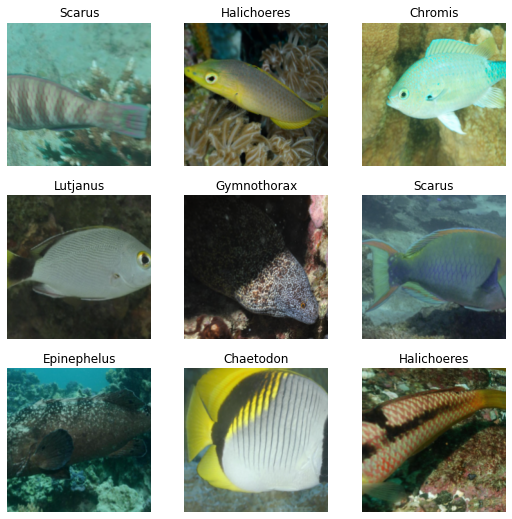

In [12]:
learner.dls.show_batch()

In [16]:
set(
    [
        path.name.split("-")[0].capitalize()
        for path in Path("/home/yanir/projects/deep-fish/data/rls-top-10-genera").ls()
    ]
)

{'Acanthurus',
 'Chaetodon',
 'Chromis',
 'Epinephelus',
 'Gymnothorax',
 'Halichoeres',
 'Lutjanus',
 'Pomacentrus',
 'Scarus',
 'Stegastes'}